In [ ]:
import os
import cv2
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d aleksandarcvetanov/iq-othnccd-lung-cancer-augmented-dataset

Dataset URL: https://www.kaggle.com/datasets/aleksandarcvetanov/iq-othnccd-lung-cancer-augmented-dataset
License(s): Apache 2.0
100% 947M/951M [00:35<00:00, 25.5MB/s]
100% 951M/951M [00:35<00:00, 28.1MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/iq-othnccd-lung-cancer-augmented-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Function to load the images and generate the labels
def load_images(folder_path):
    train_images = []
    test_images = []
    train_labels = []
    test_labels = []
    class_folders = sorted(os.listdir(folder_path))

    for class_folder in class_folders:
        class_path = os.path.join(folder_path, class_folder)

        if os.path.isdir(class_path) and not class_folder.endswith(".txt"):
            train_folder_path = os.path.join(class_path, "Train")
            test_folder_path = os.path.join(class_path, "Test")

            # Check if the train folder exists and process its images
            if os.path.exists(train_folder_path):
                for file in os.listdir(train_folder_path):
                    image_path = os.path.join(train_folder_path, file)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    image = cv2.resize(image, (256, 256))
                    train_images.append(image)
                    train_labels.append(class_folder)

            # Check if the test folder exists and process its images
            if os.path.exists(test_folder_path):
                for file in os.listdir(test_folder_path):
                    image_path = os.path.join(test_folder_path, file)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    image = cv2.resize(image, (256, 256))
                    test_images.append(image)
                    test_labels.append(class_folder)

    return np.array(train_images), np.array(test_images), np.array(train_labels), np.array(test_labels)


In [ ]:
# Path to the dataset
dataset_path = "/content/The IQ-OTHNCCD Lung Cancer Augmented Dataset"
train_images, test_images, train_labels, test_labels = load_images(dataset_path)

In [ ]:
# Label mapping
label_mapping = {"Normal cases": 0, "Benign cases": 1, "Malignant cases": 2}
train_labels = np.array([label_mapping[label] for label in train_labels])
test_labels = np.array([label_mapping[label] for label in test_labels])

In [ ]:
# Reshape the training and test dataset before feeding them to the CNN
x_train = train_images.reshape(train_images.shape[0], 256, 256, 1)
x_test = test_images.reshape(test_images.shape[0], 256, 256, 1)
y_train = train_labels
y_test = test_labels

In [ ]:
# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [ ]:
input_shape = (256, 256, 1)

In [ ]:
# Creating the Convolutional Neural Network
model = Sequential()
model.add(Conv2D(128, kernel_size=(7, 7), activation='relu', input_shape=input_shape))

model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 128)     6400      
                                                                 
 conv2d_1 (Conv2D)           (None, 246, 246, 64)      204864    
                                                                 
 conv2d_2 (Conv2D)           (None, 242, 242, 64)      102464    
                                                                 
 max_pooling2d (MaxPooling2  (None, 121, 121, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 121, 121, 64)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 117, 117, 64)      102464    
                                                        

In [ ]:
# Train the model with validation
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
107/107 [==============================] - 247s 2s/step - loss: 1.6704 - accuracy: 0.4426 - val_loss: 0.9921 - val_accuracy: 0.5185
Epoch 2/10
107/107 [==============================] - 158s 1s/step - loss: 0.9406 - accuracy: 0.5468 - val_loss: 0.9719 - val_accuracy: 0.5973
Epoch 3/10
107/107 [==============================] - 159s 1s/step - loss: 0.8637 - accuracy: 0.5923 - val_loss: 0.7982 - val_accuracy: 0.6373
Epoch 4/10
107/107 [==============================] - 154s 1s/step - loss: 0.7154 - accuracy: 0.6761 - val_loss: 0.5717 - val_accuracy: 0.7513
Epoch 5/10
107/107 [==============================] - 154s 1s/step - loss: 0.5820 - accuracy: 0.7542 - val_loss: 0.5073 - val_accuracy: 0.8219
Epoch 6/10
107/107 [==============================] - 158s 1s/step - loss: 0.4572 - accuracy: 0.8099 - val_loss: 0.3960 - val_accuracy: 0.8519
Epoch 7/10
107/107 [==============================] - 154s 1s/step - loss: 0.3824 - accuracy: 0.8456 - val_loss: 0.2751 - val_accuracy: 0.9030

In [ ]:
# Save the model
model.save("lung_cancer_detection_model.h5")

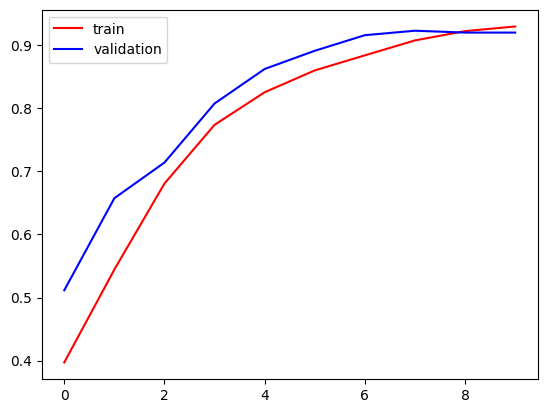

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

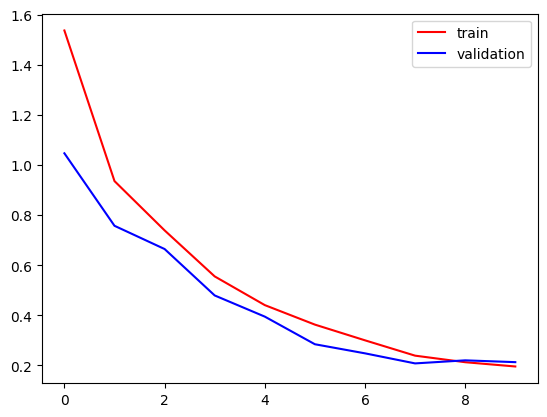

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
img_width = 256
img_height = 256

116/116 [==============================] - 26s 136ms/step


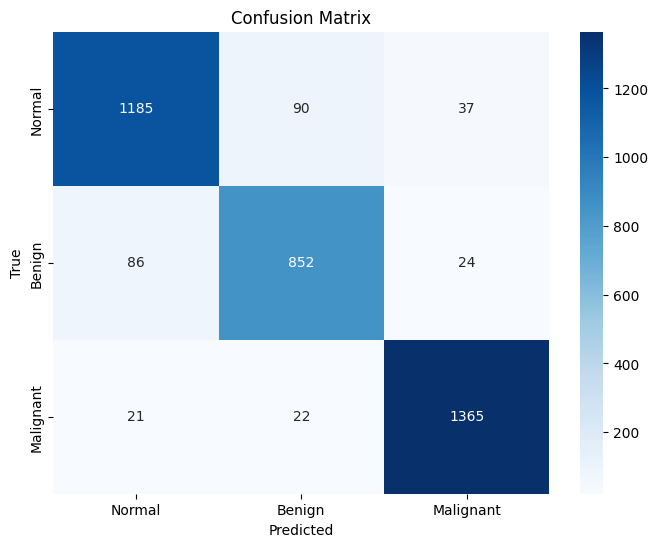

In [ ]:
# Calculating the confusion matrix
y_prediction = model.predict(x_test)
y_prediction_classes = np.argmax(y_prediction, axis = 1)
y_true_classes = y_test

matrix = confusion_matrix(y_true_classes, y_prediction_classes)

plt.figure(figsize = (8, 6))
sns.heatmap(matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Normal', 'Benign', 'Malignant'], yticklabels = ['Normal', 'Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Function for making predictions and visualizing results
def predict_and_visualize(image_path, model):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (256, 256))
    img_resized = np.expand_dims(img_resized, axis=-1)
    img_resized = np.expand_dims(img_resized, axis=0)

    prediction = model.predict(img_resized)
    class_label = np.argmax(prediction)
    confidence = prediction[0][class_label]

    class_labels_to_categories = {0: 'Normal', 1: 'Benign', 2: 'Malignant'}
    predicted_category = class_labels_to_categories[class_label]

    print("Predicted Class Label:", class_label)
    print("Confidence:", confidence)
    print("Predicted Category:", predicted_category)

    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(predicted_category)
    plt.show()


1/1 [==============================] - 1s 830ms/step
Predicted Class Label: 1
Confidence: 0.99914503
Predicted Category: Benign


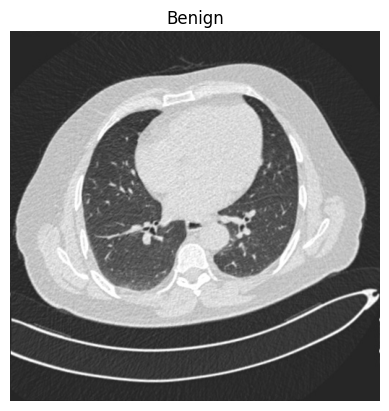

1/1 [==============================] - 0s 19ms/step
Predicted Class Label: 1
Confidence: 0.99985373
Predicted Category: Benign


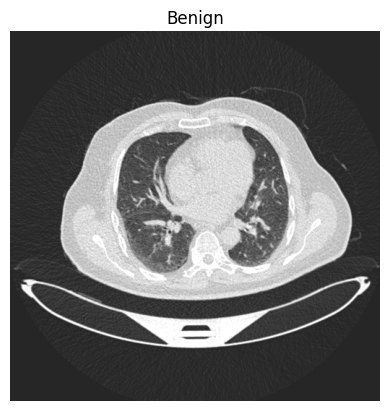

1/1 [==============================] - 0s 36ms/step
Predicted Class Label: 2
Confidence: 0.99989283
Predicted Category: Malignant


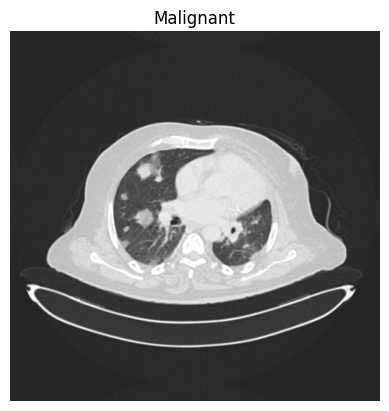

1/1 [==============================] - 0s 18ms/step
Predicted Class Label: 2
Confidence: 0.99611217
Predicted Category: Malignant


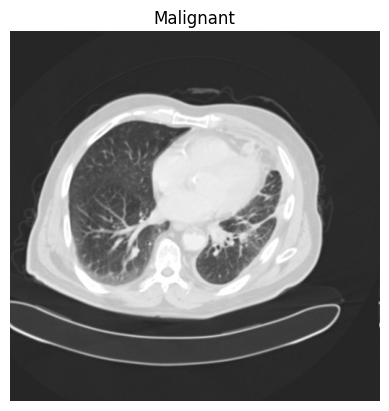

1/1 [==============================] - 0s 20ms/step
Predicted Class Label: 0
Confidence: 0.78115964
Predicted Category: Normal


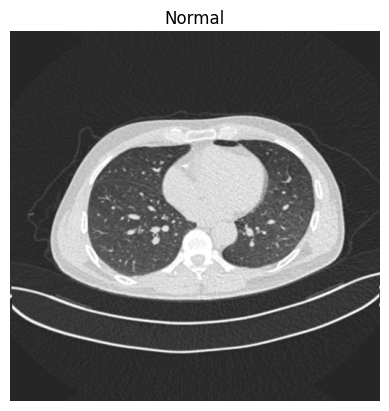

1/1 [==============================] - 0s 19ms/step
Predicted Class Label: 0
Confidence: 0.9760968
Predicted Category: Normal


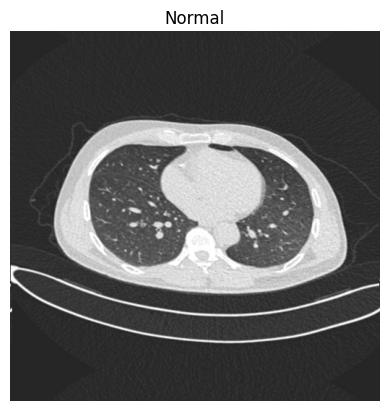

In [ ]:
# Test the function with an example image
image_path = '/content/Benign case1.jpg'
predict_and_visualize(image_path, model)

# Test the function with an example image
image_path = '/content/Bengin case3.jpg'
predict_and_visualize(image_path, model)

# Test the function with an example image
image_path = '/content/Malignant case (100)(1).jpg'
predict_and_visualize(image_path, model)

# Test the function with an example image
image_path = '/content/Malignant case (1)(1).jpg'
predict_and_visualize(image_path, model)

# Test the function with an example image
image_path = '/content/Normal case (10)(1).jpg'
predict_and_visualize(image_path, model)

# Test the function with an example image
image_path = '/content/Normal case (10)(2).jpg'
predict_and_visualize(image_path, model)
